In [625]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
import copy
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [2]:
file = pd.read_csv("avocado.csv")
file

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [324]:
data = file.drop(["Unnamed: 0","Total Bags","Small Bags","Large Bags","XLarge Bags"],axis=1)
data.head(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,conventional,2015,Albany


After dropping all the irrelevant columns from out dataset we observe that a few columns have categorical data therefore we use categorical encoder to classify them

In [325]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
dtype: int64

We observe that there are no missing values in the dataset

In [326]:
df = data
df

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico


In [327]:
le = LabelEncoder()
df["type"] = le.fit_transform(data["type"])
df["region"] = le.fit_transform(df["region"])
df["Date"] = le.fit_transform(df["Date"])
df["year"] = le.fit_transform(df["year"])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


In [328]:
df["Date"].unique()

array([ 51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,
        38,  37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1,   0,
       103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,  91,
        90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,  78,
        77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,  52,
       156, 155, 154, 153, 152, 151, 150, 149, 148, 147, 146, 145, 144,
       143, 142, 141, 140, 139, 138, 137, 136, 135, 134, 133, 132, 131,
       130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 120, 119, 118,
       117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105,
       104, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157])

In [329]:
df["year"].unique()

array([0, 1, 2, 3])

We see that there are 169 dates for which there are transactions present

## EDA

In [330]:
corr_matrix = df.corr()
corr_matrix

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.210027,-0.036531,0.095252
type,-0.000060,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,1.000000,-0.000032,-0.000280
year,0.950274,0.093197,0.017193,0.003353,-0.009559,-0.036531,-0.000032,1.000000,-0.000055
region,-0.000101,-0.011716,0.174176,0.192073,0.145726,0.095252,-0.000280,-0.000055,1.000000


<AxesSubplot:>

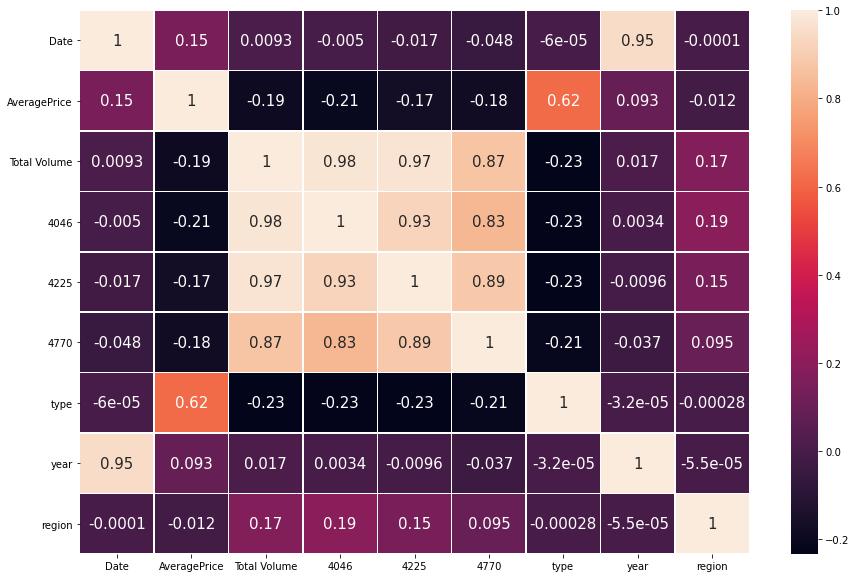

In [331]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

We observe that 4 columns : Total Volume, 4046, 4225 and 4770 have multicolinearity. 

dataframe for region 

In [340]:
dfr = copy.deepcopy(df)
dfr

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


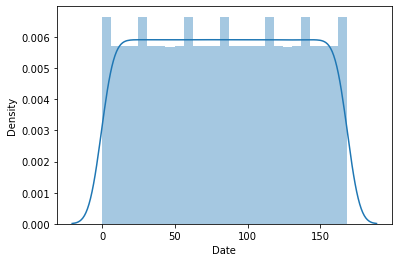

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


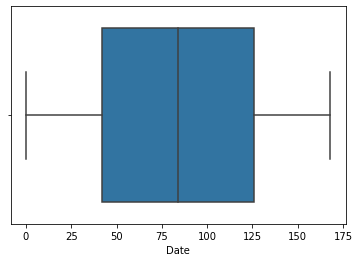

In [211]:
sns.distplot(dfr["Date"])
plt.show()
sns.boxplot(dfr["Date"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


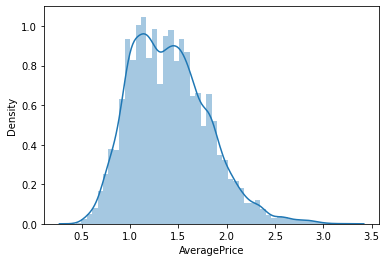

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


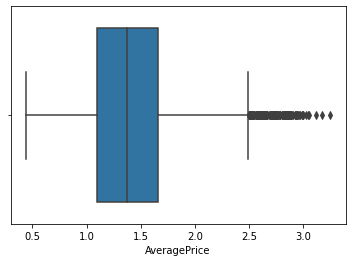

In [212]:
sns.distplot(dfr["AveragePrice"])
plt.show()
sns.boxplot(dfr["AveragePrice"])
plt.show()

In [213]:
dfr["AveragePrice"].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

Data loss is less than 1 percent

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


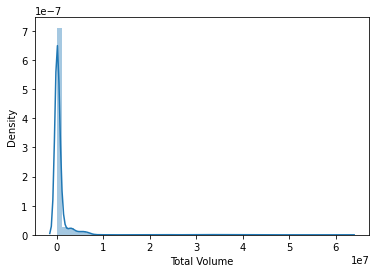

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


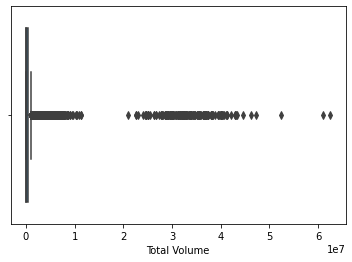

In [216]:
sns.distplot(dfr["Total Volume"])
plt.show()
sns.boxplot(dfr["Total Volume"])
plt.show()

In [218]:
dfr["Total Volume"].describe()

count    1.811800e+04
mean     8.567089e+05
std      3.465269e+06
min      8.456000e+01
25%      1.095171e+04
50%      1.104470e+05
75%      4.370558e+05
max      6.250565e+07
Name: Total Volume, dtype: float64

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


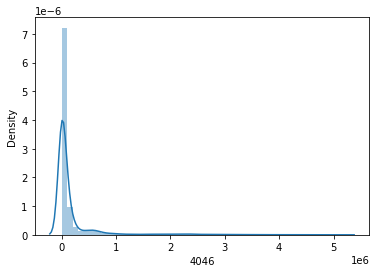

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


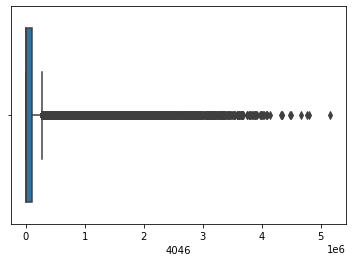

In [224]:
sns.distplot(dfr["4046"])
plt.show()
sns.boxplot(dfr["4046"])
plt.show()

In [225]:
df["4046"].describe()

count    1.824900e+04
mean     2.930084e+05
std      1.264989e+06
min      0.000000e+00
25%      8.540700e+02
50%      8.645300e+03
75%      1.110202e+05
max      2.274362e+07
Name: 4046, dtype: float64

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


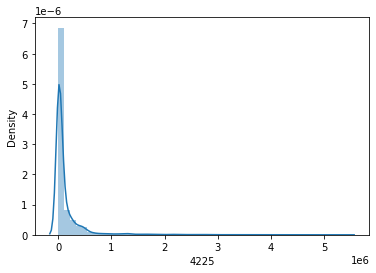

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


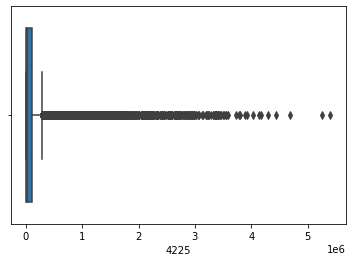

In [231]:
sns.distplot(dfr["4225"])
plt.show()
sns.boxplot(dfr["4225"])
plt.show()

In [235]:
df["4225"].describe()

count    1.824900e+04
mean     2.951546e+05
std      1.204120e+06
min      0.000000e+00
25%      3.008780e+03
50%      2.906102e+04
75%      1.502069e+05
max      2.047057e+07
Name: 4225, dtype: float64

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


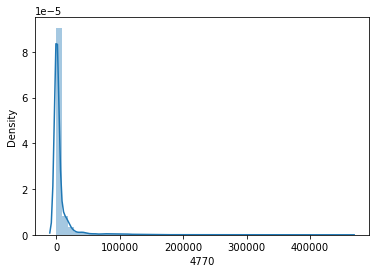

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


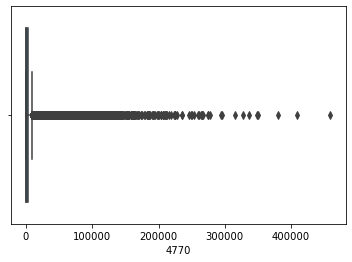

count    1.824900e+04
mean     2.283974e+04
std      1.074641e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.849900e+02
75%      6.243420e+03
max      2.546439e+06
Name: 4770, dtype: float64

In [241]:
sns.distplot(dfr["4770"])
plt.show()
sns.boxplot(dfr["4770"])
plt.show()
df["4770"].describe()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


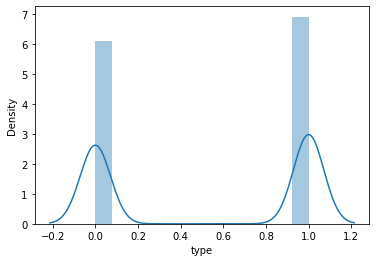

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


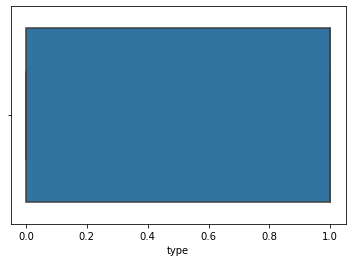

count    18249.000000
mean         0.499918
std          0.500014
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: type, dtype: float64

In [243]:
sns.distplot(dfr["type"])
plt.show()
sns.boxplot(dfr["type"])
plt.show()
df["type"].describe()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


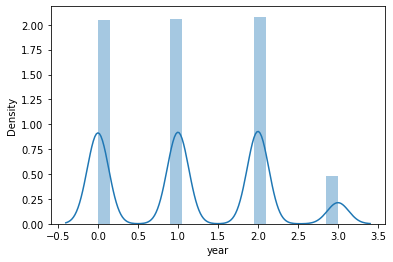

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


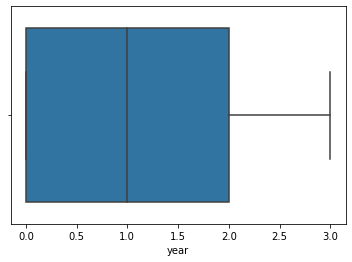

count    18249.000000
mean         1.147899
std          0.939938
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: year, dtype: float64

In [244]:
sns.distplot(dfr["year"])
plt.show()
sns.boxplot(dfr["year"])
plt.show()
df["year"].describe()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


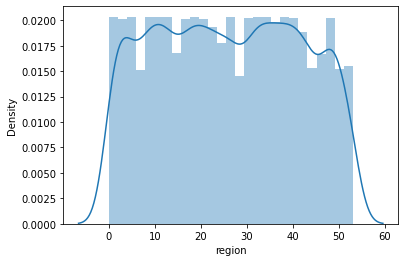

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


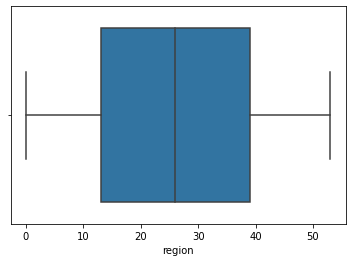

count    18249.000000
mean        26.495644
std         15.583788
min          0.000000
25%         13.000000
50%         26.000000
75%         40.000000
max         53.000000
Name: region, dtype: float64

In [245]:
sns.distplot(dfr["region"])
plt.show()
sns.boxplot(dfr["region"])
plt.show()
df["region"].describe()

In [335]:
dfr["region"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [336]:
region_count = {}
for i in dfr["region"]:
    if i in region_count:
        region_count[i]+=1
    else:
        region_count[i]=1
region_count

{0: 288,
 1: 313,
 2: 276,
 3: 301,
 4: 317,
 5: 321,
 6: 324,
 7: 313,
 8: 315,
 9: 332,
 10: 332,
 11: 334,
 12: 337,
 13: 338,
 14: 338,
 15: 311,
 16: 319,
 17: 305,
 18: 317,
 19: 328,
 20: 332,
 21: 327,
 22: 331,
 23: 332,
 24: 336,
 25: 335,
 26: 334,
 27: 338,
 28: 337,
 29: 333,
 30: 326,
 31: 335,
 32: 336,
 33: 333,
 34: 337,
 35: 333,
 36: 335,
 37: 330,
 38: 331,
 39: 335,
 40: 335,
 41: 332,
 42: 316,
 43: 337,
 44: 323,
 45: 318,
 46: 335,
 47: 316,
 48: 326,
 49: 328,
 50: 333,
 51: 286,
 52: 234,
 53: 218}

We can see that there are multiple classes present inside the target. But the data has no class imbalance

## Using zscore to remove the outliers from the data

In [333]:
for column in dfr.columns:
    zscore = stats.zscore(dfr[column])
    for i in range(len(zscore)):
        if zscore[i]>3:
            dfr = dfr.drop(i).reset_index(drop=True)
dfr

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...,...
17357,161,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
17358,160,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
17359,159,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
17360,158,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


In [334]:
(df["region"].count()-dfr["region"].count())/df["region"].count()*100

4.860540303578278

We can observe here that data loss is less than 5 percent

In [273]:
dfr

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...,...
17357,161,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
17358,160,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
17359,159,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
17360,158,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


## Bivariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


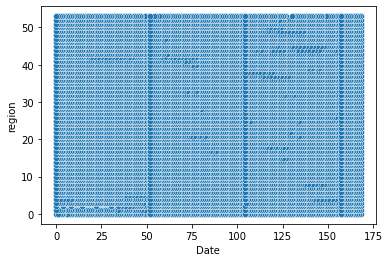

In [283]:
sns.scatterplot(dfr["Date"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


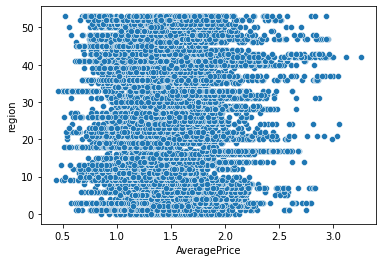

In [284]:
sns.scatterplot(dfr["AveragePrice"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


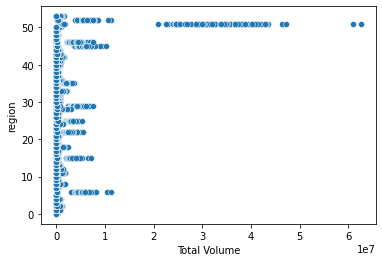

In [285]:
sns.scatterplot(dfr["Total Volume"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


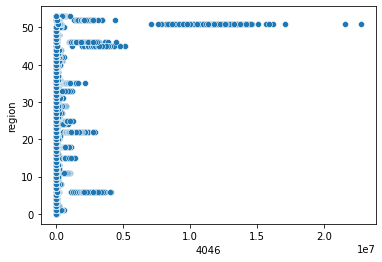

In [286]:
sns.scatterplot(dfr["4046"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


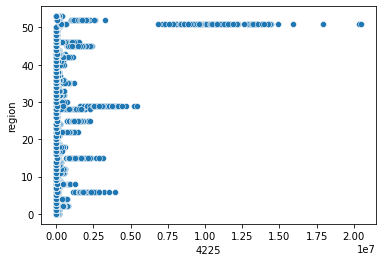

In [287]:
sns.scatterplot(dfr["4225"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


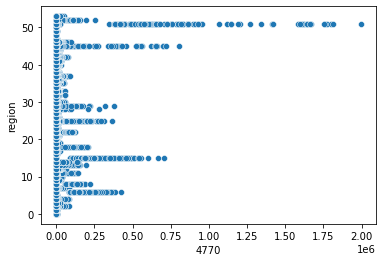

In [288]:
sns.scatterplot(dfr["4770"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


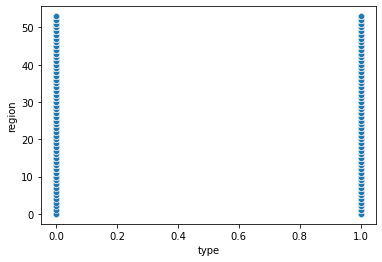

In [289]:
sns.scatterplot(dfr["type"],dfr["region"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


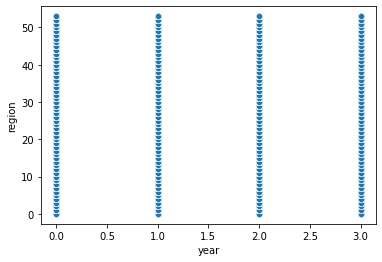

In [290]:
sns.scatterplot(dfr["year"],dfr["region"])
plt.show()

## Multivariate Analysis

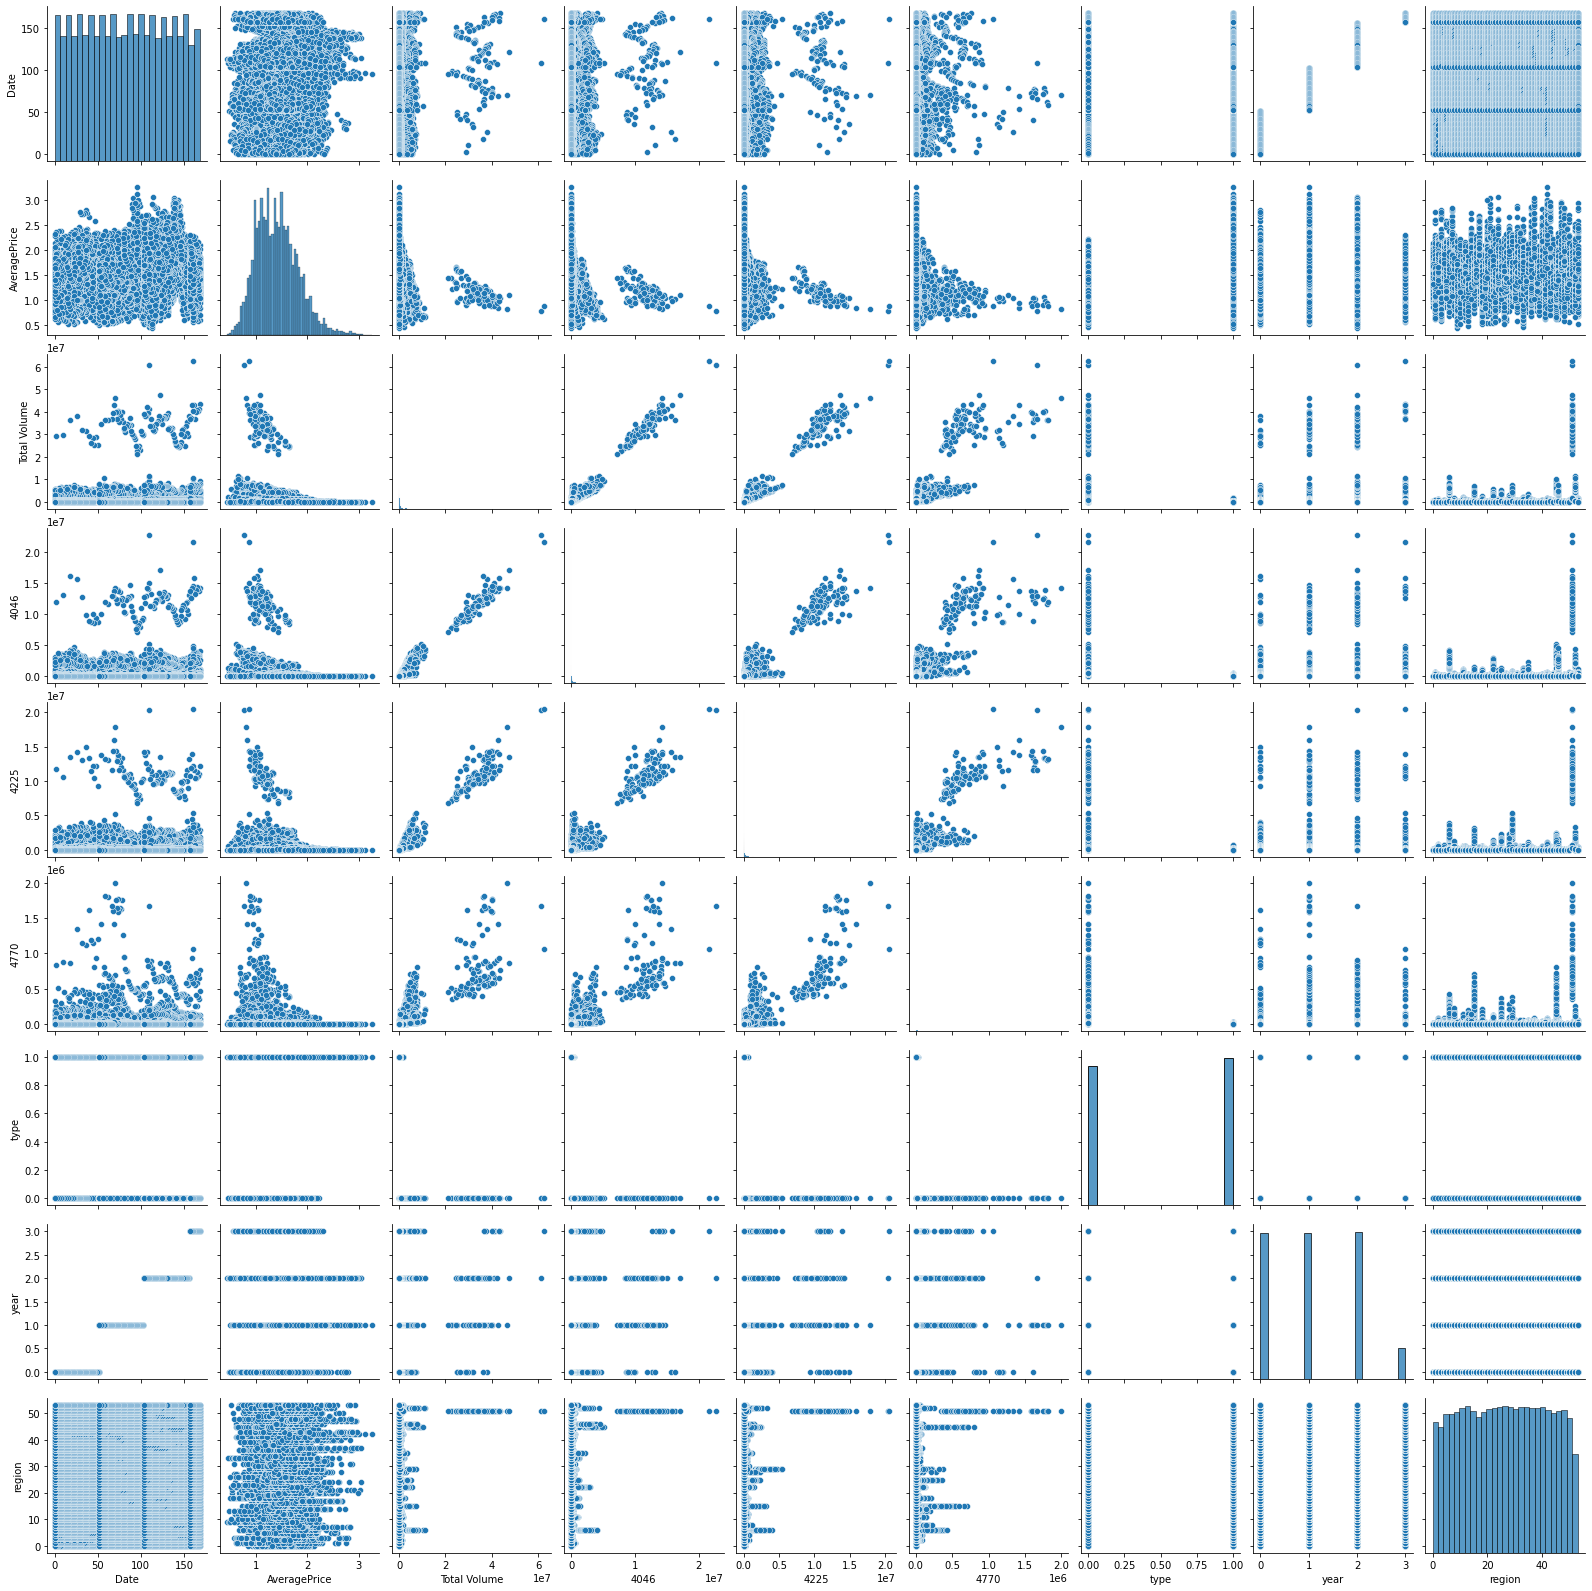

In [291]:
sns.pairplot(dfr)

## Data Preprocessing

In [294]:
scaler = StandardScaler()

In [342]:
dfr

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


In [527]:
X = dfr.drop("region",axis=1)
X = scaler.fit_transform(X)
X

array([[-0.67635986, -0.18868864, -0.22771641, ..., -0.21209136,
        -0.99983562, -1.22128204],
       [-0.69685742, -0.13901962, -0.23042664, ..., -0.21199672,
        -0.99983562, -1.22128204],
       [-0.71735497, -1.18206895, -0.21208462, ..., -0.21132513,
        -0.99983562, -1.22128204],
       ...,
       [ 1.53737632,  1.15237477, -0.24233073, ..., -0.20576554,
         1.00016441,  1.97050371],
       [ 1.51687877,  1.30138182, -0.24162464, ..., -0.20577419,
         1.00016441,  1.97050371],
       [ 1.49638121,  0.53151208, -0.24125273, ..., -0.21045012,
         1.00016441,  1.97050371]])

In [528]:
y = dfr["region"]
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int64

In [529]:
pca = PCA()

In [530]:
pca.fit_transform(X)

array([[-0.1659117 , -1.4592559 , -0.62616457, ..., -0.02848344,
         0.34143041, -0.00947577],
       [-0.17917939, -1.46451393, -0.59186137, ..., -0.0364319 ,
         0.32311266, -0.01088266],
       [ 0.03181122, -1.67301453, -1.2717164 , ...,  0.05790252,
         0.38433464, -0.00352902],
       ...,
       [-0.89682344,  2.68145101,  0.81885001, ..., -0.0067251 ,
        -0.32396546,  0.02980385],
       [-0.92061733,  2.69555937,  0.92058335, ..., -0.01320713,
        -0.34902201,  0.02914893],
       [-0.79282357,  2.53560016,  0.41226523, ...,  0.02608966,
        -0.30914582,  0.02981664]])

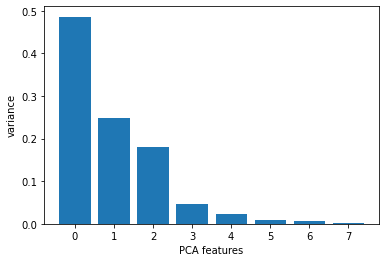

In [531]:
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [532]:
pca.explained_variance_ratio_

array([0.48637324, 0.24781758, 0.18038511, 0.04723639, 0.02367327,
       0.00777684, 0.00588667, 0.0008509 ])

In [533]:
pca = PCA(n_components=3)

In [534]:
X = dfr.drop("region",axis=1)
X = scaler.fit_transform(X)
X

array([[-0.67635986, -0.18868864, -0.22771641, ..., -0.21209136,
        -0.99983562, -1.22128204],
       [-0.69685742, -0.13901962, -0.23042664, ..., -0.21199672,
        -0.99983562, -1.22128204],
       [-0.71735497, -1.18206895, -0.21208462, ..., -0.21132513,
        -0.99983562, -1.22128204],
       ...,
       [ 1.53737632,  1.15237477, -0.24233073, ..., -0.20576554,
         1.00016441,  1.97050371],
       [ 1.51687877,  1.30138182, -0.24162464, ..., -0.20577419,
         1.00016441,  1.97050371],
       [ 1.49638121,  0.53151208, -0.24125273, ..., -0.21045012,
         1.00016441,  1.97050371]])

In [535]:
pca.fit_transform(X)

array([[-0.1659117 , -1.4592559 , -0.62616457],
       [-0.17917939, -1.46451393, -0.59186137],
       [ 0.03181122, -1.67301453, -1.2717164 ],
       ...,
       [-0.89682344,  2.68145101,  0.81885001],
       [-0.92061733,  2.69555937,  0.92058335],
       [-0.79282357,  2.53560016,  0.41226523]])

In [536]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

## Model Learning To find Region

### k-Nearest Neighbors. 

In [537]:
neighbors = np.arange(1, 55)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 

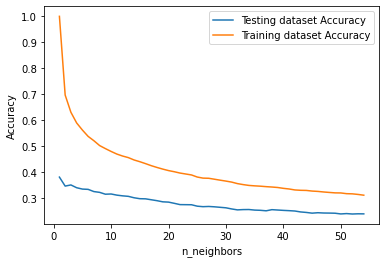

In [538]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [539]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [540]:
print(knn.predict(X_test))

[11 19 51 ...  0 25  0]


In [541]:
y_test

9181      1
1013     19
14625    51
15234     9
18247    53
         ..
10657    29
17490    51
6634     19
10947    35
13532    30
Name: region, Length: 3650, dtype: int64

In [542]:
knn.score(X_train,y_train)

0.6310021234331119

In [543]:
knn.score(X_test, y_test)

0.3515068493150685

In [544]:
y_pred = knn.predict(X_test)

In [545]:
metrics.accuracy_score(y_test,y_pred)

0.3515068493150685

### Decision Trees.

In [548]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)

y_pred = DTC.predict(X_test)

In [549]:
metrics.accuracy_score(y_test,y_pred)

0.7767123287671233

In [556]:
depth=[]
for i in range(0,20):
    clf = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf,X,y, cv=4, n_jobs=4)
    depth.append([i,np.mean(scores)])
print(depth)


[[0, nan], [1, 0.018466768470983896], [2, 0.018521568997068947], [3, 0.02789145013793447], [4, 0.028165452768359727], [5, 0.028329854346614877], [6, 0.030576303613601693], [7, 0.03994620877398337], [8, 0.07046804813472604], [9, 0.09676995875272609], [10, 0.15359369672171072], [11, 0.20269315462044696], [12, 0.2706970886328793], [13, 0.32664436646748723], [14, 0.37256422890675744], [15, 0.41585557564547887], [16, 0.44555646397365617], [17, 0.4815030990460121], [18, 0.47783177605202354], [19, 0.4835308386087397]]
[19, 0.4835308386087397]


We observe that the accuracy of our model increases with more depth

In [555]:
DTC = DecisionTreeClassifier(max_depth=210)
DTC.fit(X_train,y_train)

y_pred = DTC.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.776986301369863

###  Naive Bayes. 

In [436]:
nb = GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

In [437]:
metrics.accuracy_score(y_test,y_pred)

0.2586301369863014

In [559]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = GaussianNB()
print(cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))

[0.26976821 0.25184942 0.26450764]


### Random Forest.

In [561]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

In [562]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8772602739726028


In [563]:
k_fold = KFold(n_splits=3, shuffle=True, random_state=0)
clf = RandomForestClassifier()
print(cross_val_score(clf, X, y, cv=k_fold, n_jobs=1))

[0.86651323 0.8717738  0.86782837]


From the above models we observe that Random Forest classifier has the best accuracy.

# Using hyperparameters to improve the accuracy of random forest classifier

In [444]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [462]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=10,random_state=5,warm_start=True)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=10, random_state=5, warm_start=True)

In [463]:
y_pred=rfc.predict(X_test)

In [464]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8805479452054794


# To predict Average Price

<AxesSubplot:>

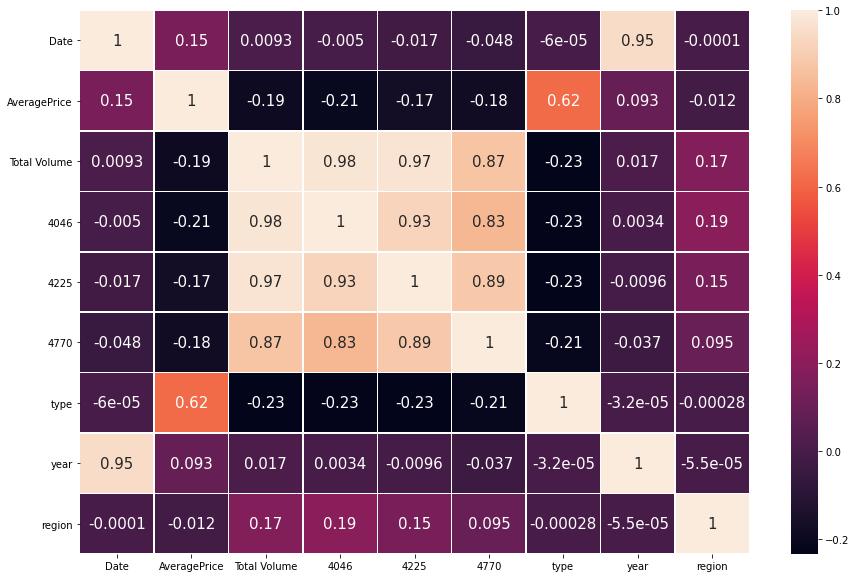

In [465]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,linewidths=.5,annot_kws={'size': 15})

In [466]:
dfap = copy.deepcopy(df)
dfap

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,0,0,0
2,49,0.93,118220.22,794.70,109149.67,130.50,0,0,0
3,48,1.08,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,1.28,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...,...
18244,161,1.63,17074.83,2046.96,1529.20,0.00,1,3,53
18245,160,1.71,13888.04,1191.70,3431.50,0.00,1,3,53
18246,159,1.87,13766.76,1191.92,2452.79,727.94,1,3,53
18247,158,1.93,16205.22,1527.63,2981.04,727.01,1,3,53


# EDA

We have done the univariate analysis for all the columns above therefore we skip to bivariate analysis

# Bivariate Analysis

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


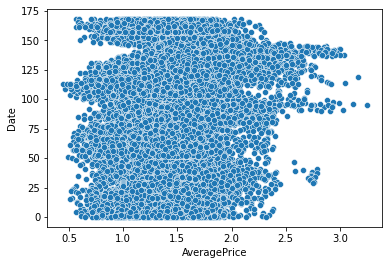

In [467]:
sns.scatterplot(dfap["AveragePrice"],df["Date"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


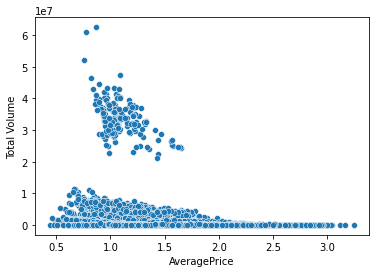

In [468]:
sns.scatterplot(dfap["AveragePrice"],df["Total Volume"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


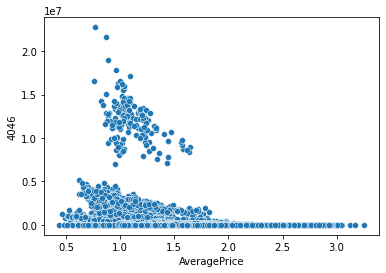

In [469]:
sns.scatterplot(dfap["AveragePrice"],df["4046"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


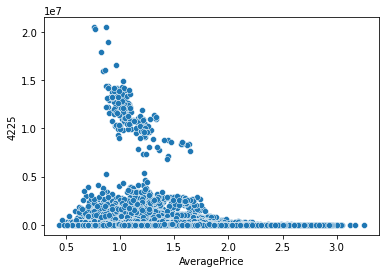

In [470]:
sns.scatterplot(dfap["AveragePrice"],df["4225"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


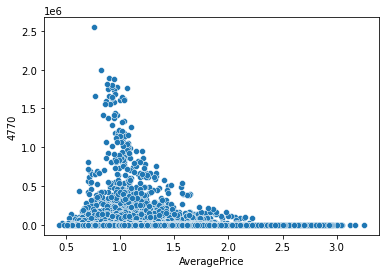

In [471]:
sns.scatterplot(dfap["AveragePrice"],df["4770"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


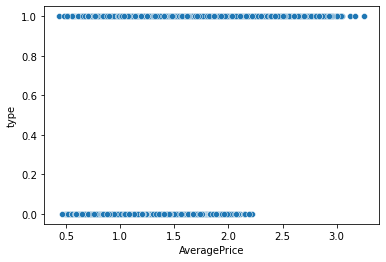

In [472]:
sns.scatterplot(dfap["AveragePrice"],df["type"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


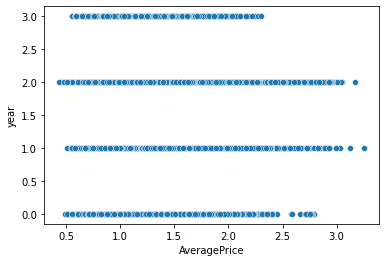

In [473]:
sns.scatterplot(dfap["AveragePrice"],df["year"])
plt.show()

/home/osux/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


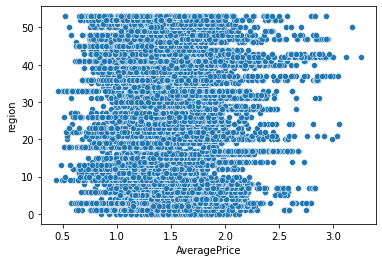

In [474]:
sns.scatterplot(dfap["AveragePrice"],df["region"])
plt.show()

## Multivariate Analysis

We have done the multivariate analysis above as well

# Data Preprocessing

In [565]:
y = df["AveragePrice"]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [566]:
X = df.drop("AveragePrice",axis=1)
X

,Date,Total Volume,4046,4225,4770,type,year,region
0,51,64236.62,1036.74,54454.85,48.16,0,0,0
1,50,54876.98,674.28,44638.81,58.33,0,0,0
2,49,118220.22,794.70,109149.67,130.50,0,0,0
3,48,78992.15,1132.00,71976.41,72.58,0,0,0
4,47,51039.60,941.48,43838.39,75.78,0,0,0
...,...,...,...,...,...,...,...,...
18244,161,17074.83,2046.96,1529.20,0.00,1,3,53
18245,160,13888.04,1191.70,3431.50,0.00,1,3,53
18246,159,13766.76,1191.92,2452.79,727.94,1,3,53
18247,158,16205.22,1527.63,2981.04,727.01,1,3,53


In [567]:
scaler = StandardScaler()

In [568]:
X = scaler.fit_transform(X)
X

array([[-0.67635986, -0.22771641, -0.23081597, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.23042664, -0.23110251, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -0.21208462, -0.23100731, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632, -0.24233073, -0.2306933 , ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877, -0.24162464, -0.2304279 , ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121, -0.24125273, -0.22934712, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [569]:
pca = PCA()

In [570]:
pca.fit_transform(X)

array([[-0.43207254, -1.35104587, -1.96024484, ...,  0.02259375,
        -0.38126905, -0.01064467],
       [-0.43732891, -1.36564381, -1.96015094, ...,  0.01519679,
        -0.36734536, -0.01197621],
       [-0.40079678, -1.37941361, -1.9605124 , ...,  0.05546587,
        -0.34940699, -0.00582462],
       ...,
       [-0.46597158,  2.47614897,  1.95998009, ..., -0.00347147,
         0.30598358,  0.03194049],
       [-0.46500786,  2.46168955,  1.96004553, ..., -0.00446119,
         0.32045241,  0.03147275],
       [-0.46647976,  2.44732055,  1.96038859, ..., -0.00555763,
         0.33497849,  0.03126808]])

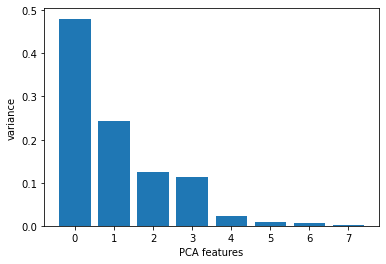

In [571]:
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel("PCA features")
plt.ylabel("variance")
plt.show()

In [572]:
pca.explained_variance_ratio_

array([0.48032368, 0.24397438, 0.12540851, 0.1122955 , 0.0230184 ,
       0.00793394, 0.00619469, 0.0008509 ])

In [573]:
ratio_sum = 0
count = 0
for i in pca.explained_variance_ratio_:
    ratio_sum += i
    count+=1
    if ratio_sum>0.7:
        break
print(count)

2


In [574]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [575]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [576]:
pca = PCA(n_components=3)

In [577]:
pca.fit(X_train)

PCA(n_components=3)

In [578]:
pca.explained_variance_

array([3.84988211, 1.95138306, 1.00830757])

In [579]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Linear Regression

In [580]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [581]:
score = lr.score(X_test,y_test)
score

0.1879852523553157

In [582]:
y_pred = lr.predict(X_test)
y_pred

array([1.29376268, 1.23744653, 1.6399091 , ..., 1.3395152 , 1.52144419,
       1.51773717])

In [583]:
y_test

9181     1.48
1013     1.05
14625    1.27
15234    2.15
18247    1.93
         ... 
10657    2.07
17490    1.41
6634     1.76
10947    1.69
13532    1.61
Name: AveragePrice, Length: 3650, dtype: float64

In [584]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.3636843295977136

In [585]:
scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=3)
scores

array([0.16693283, 0.1719871 , 0.18397629])

In [586]:
print(np.mean(scores),np.std(scores))

0.17429874072679893 0.007147381577488384


### Decision Tree Regression

In [588]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=i)
    DTR = DecisionTreeRegressor(max_depth=2)
    DTR.fit(X_train, y_train)
    r2 = DTR.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.4484188361611763


66

In [589]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=index)

In [590]:
DTR = DecisionTreeRegressor(max_depth=2)
DTR.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [591]:
y_pred = DTR.predict(X_test)
y_pred

array([1.25950737, 1.0491021 , 1.0491021 , ..., 1.0491021 , 1.76322668,
       1.25950737])

In [592]:
r2 = DTR.score(X_test,y_test)
r2

0.44841883616117606

In [593]:
y_test

4643     1.18
4055     0.88
4833     0.97
428      1.18
3770     0.88
         ... 
16560    1.50
231      1.18
1388     1.11
17509    2.37
7989     1.37
Name: AveragePrice, Length: 5475, dtype: float64

In [594]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.3000972437243971

In [611]:
scores = cross_val_score(DTR, X_train, y_train, scoring='r2', cv=3)
scores

array([0.4263857 , 0.41615283, 0.42911338])

In [612]:
print(np.mean(scores),np.std(scores))

0.4238839691614369 0.005579005271499766


### Support Vector Regression

In [595]:
score_max = 0
index = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=i)
    svr = SVR()
    svr.fit(X_train, y_train)
    r2 = svr.score(X_test,y_test)
    if r2>score_max:
        score_max = r2
        index = i
print (score_max)
index

0.5744860918744055


79

In [596]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state=index)

In [597]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [598]:
y_pred = svr.predict(X_test)
y_pred

array([1.69984526, 1.69185813, 1.14759613, ..., 1.53857732, 1.72663063,
       1.69502963])

In [599]:
r2 = svr.score(X_test,y_test)
r2

0.5744860918744055

In [600]:
y_test

17423    1.76
11704    1.81
229      1.17
2999     0.65
3991     0.73
         ... 
6988     0.95
5958     1.49
13367    1.80
15757    1.54
16633    1.59
Name: AveragePrice, Length: 5475, dtype: float64

In [601]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.26347921317483497

In [613]:
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=3)
scores

array([0.53266399, 0.52640099, 0.53310622])

In [614]:
print(np.mean(scores),np.std(scores))

0.5307237346379696 0.003061966603429637


### Random Forest Regression

In [604]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [605]:
y_pred = rfr.predict(X_test)
y_pred

array([1.7495, 1.7505, 1.1455, ..., 1.6336, 1.7912, 1.8108])

In [606]:
r2 = rfr.score(X_test,y_test)
r2

0.9108403838712612

In [607]:
y_test

17423    1.76
11704    1.81
229      1.17
2999     0.65
3991     0.73
         ... 
6988     0.95
5958     1.49
13367    1.80
15757    1.54
16633    1.59
Name: AveragePrice, Length: 5475, dtype: float64

In [608]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.12060729383427601

In [609]:
scores = cross_val_score(rfr, X_train, y_train, scoring='r2',cv=4)
scores

array([0.88850083, 0.88166155, 0.88580589, 0.89088012])

In [610]:
print(np.mean(scores),np.std(scores))

0.8867121004553974 0.0034242230829027967


From the above algorithms we can see that random forest regression has the best model score 

# Using hyperparameters on Random Forest Regression to improve accuracy.

In [617]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [623]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [624]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [632]:
rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 20, cv = 3, random_state=42)
rfr_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [633]:
rfr_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [635]:
rfr = RandomForestRegressor(n_estimators = 800,min_samples_split = 2,min_samples_leaf=1,max_features='sqrt',max_depth= 20,bootstrap= False)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=800)

In [636]:
r2 = rfr.score(X_test,y_test)
r2

0.9121238297218864